In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
!pip install tensorflow

In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Đọc Data Test và Data Train**

In [124]:
df_train = pd.read_csv('/content/drive/MyDrive/DS102/kdd_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DS102/kdd_test.csv')

**Đọc tổng quát Data Train**

In [125]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


**Chiều của Data Train**

In [126]:
df_train.shape

(125973, 42)

**Kiểu dữ liệu của từng thuộc tính**

In [127]:
df_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

**Đếm các giá trị Null của từng Feartures**

In [128]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Trực quan hóa Data**

In [129]:
column = df_train.columns

In [130]:
column

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

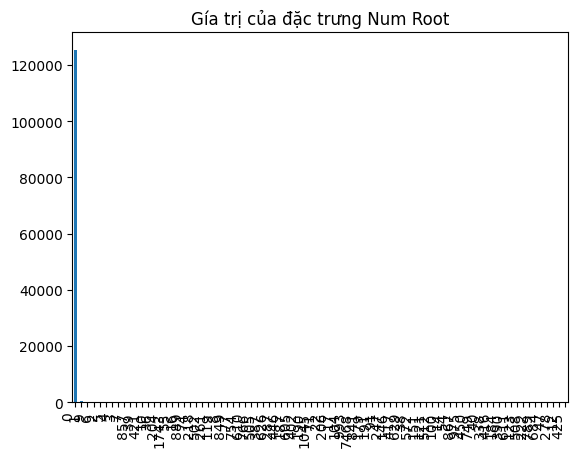

In [131]:
df_train['num_root'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Num Root')
plt.xticks(rotation=90, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

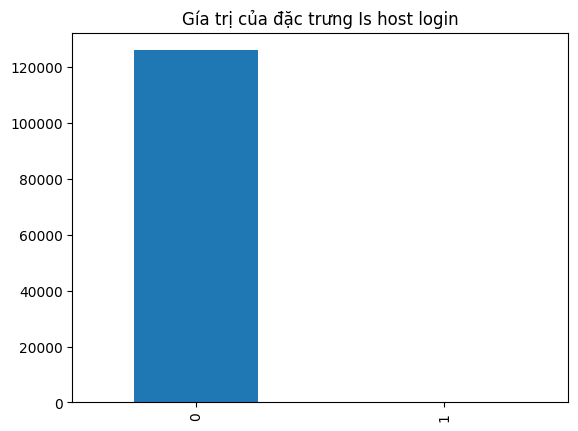

In [132]:
df_train['is_host_login'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Is host login')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

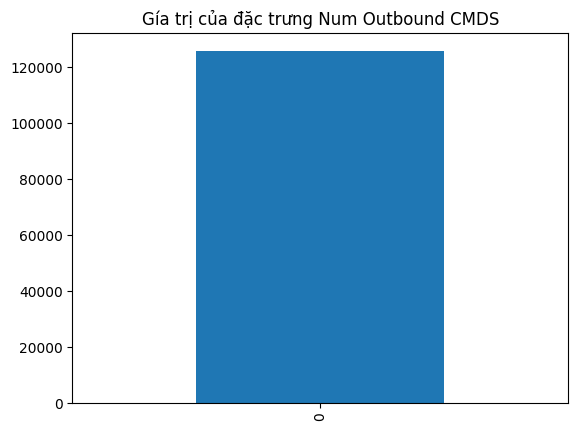

In [133]:
df_train['num_outbound_cmds'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Num Outbound CMDS')
plt.show

In [134]:
del df_train['num_outbound_cmds']
del df_train['is_host_login']
del df_train['num_root']

In [135]:
del df_test['num_outbound_cmds']
del df_test['is_host_login']
del df_test['num_root']

In [136]:
df_train.shape

(125973, 39)

**Nhận xét: Có thể loại bỏ Feature Num_outbound_cmds**

<Axes: >

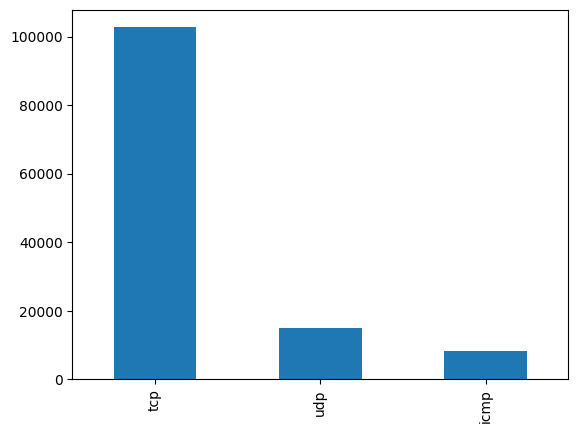

In [137]:
df_train['protocol_type'].value_counts().plot(kind="bar")

<Axes: >

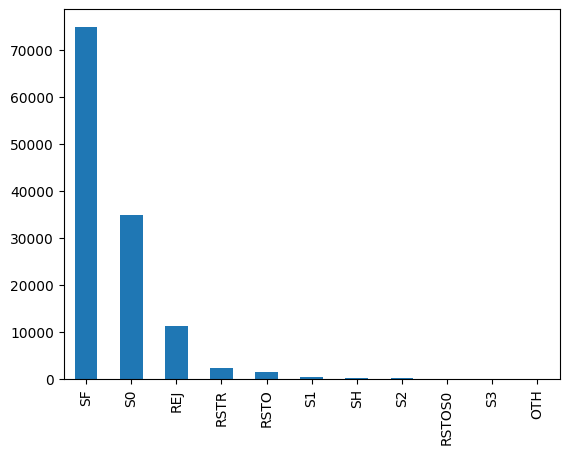

In [138]:
df_train['flag'].value_counts().plot(kind="bar")

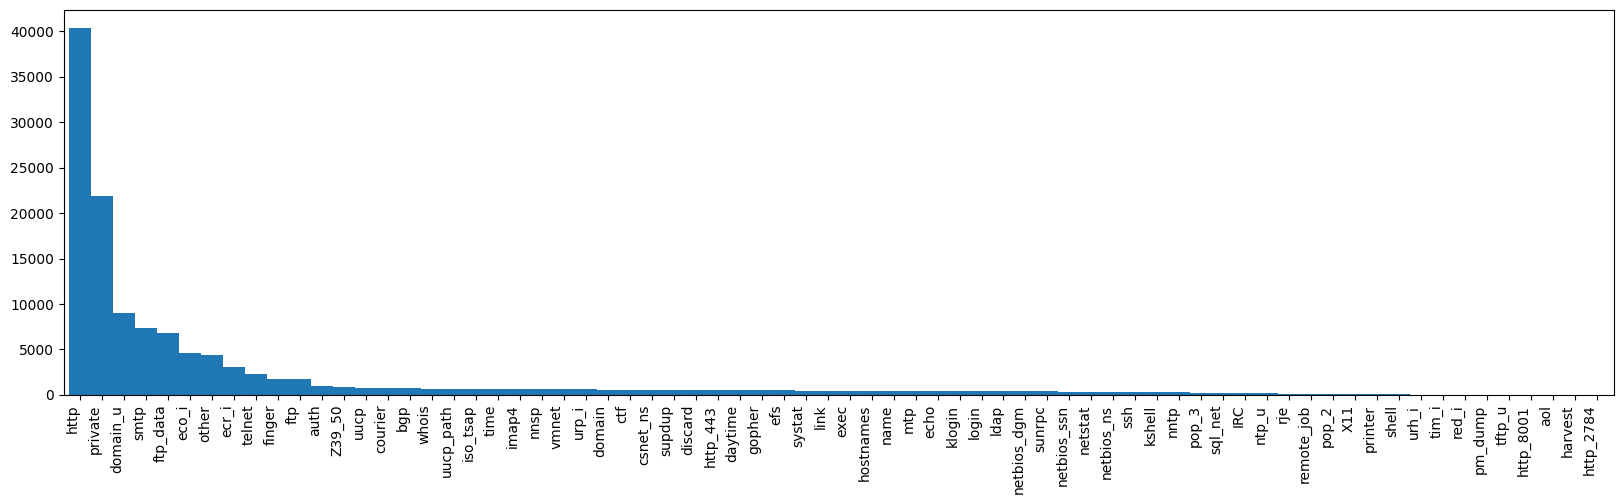

In [139]:
plt.figure(figsize=(20, 5))
df_train['service'].value_counts().plot(kind="bar", width=1)
plt.xticks(rotation=90, ha='right')
plt.show()

**Correlation giữa các Feartures**

<ipython-input-140-9534cb99d480>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


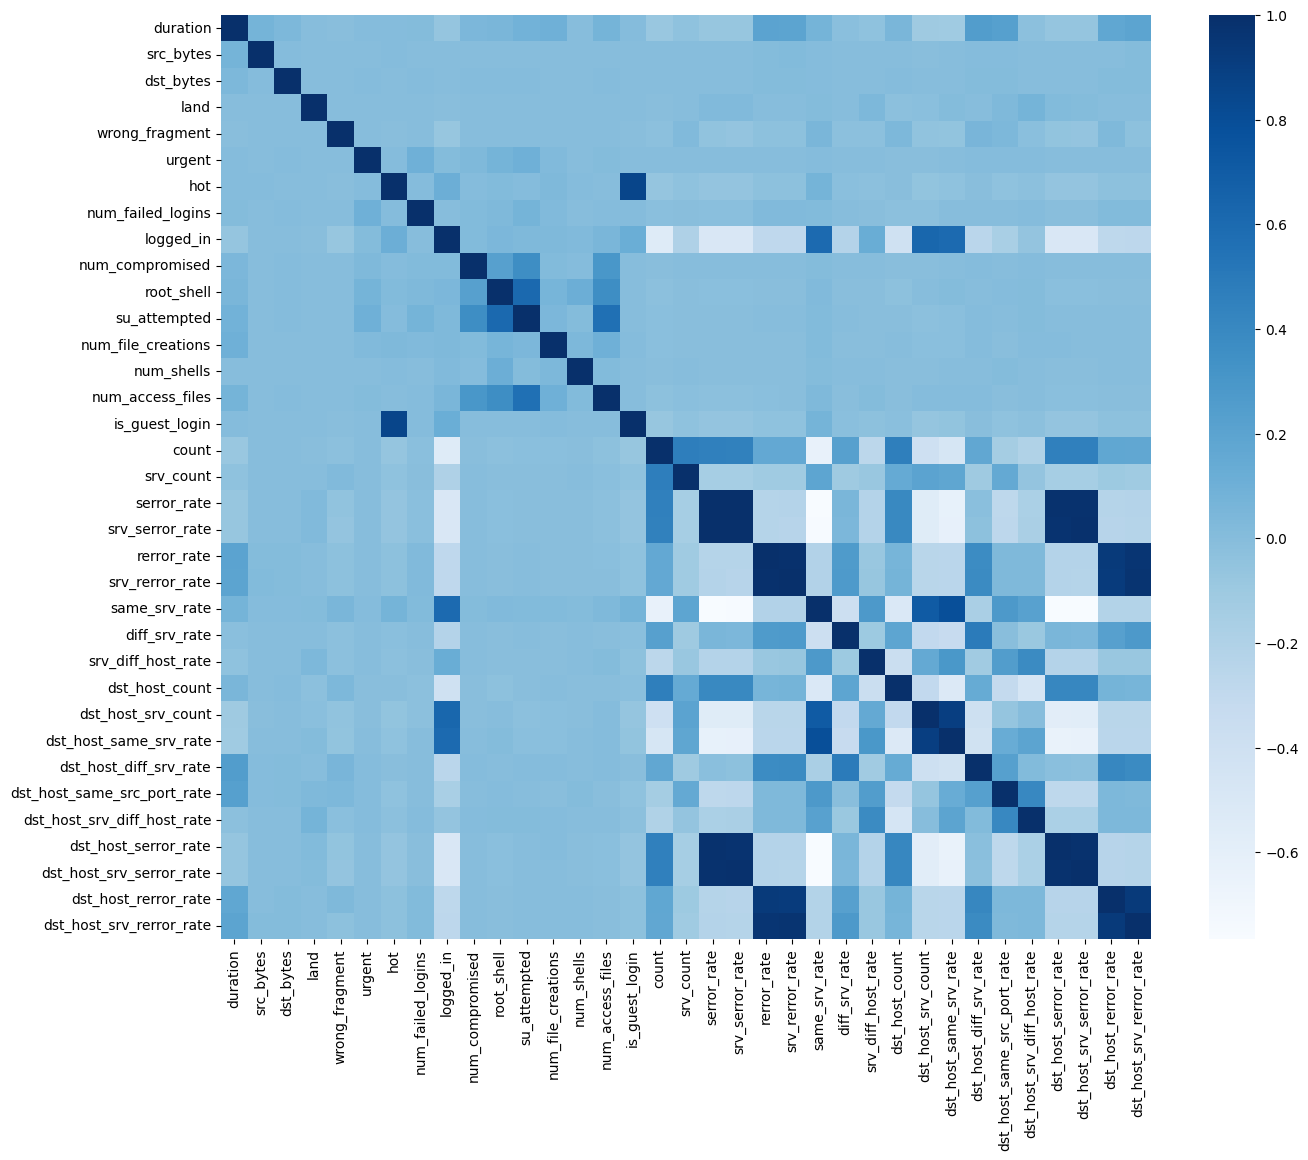

In [140]:
corr = df_train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap="Blues")
plt.show()

**Features Choosing**

In [141]:
df_train.drop('service',axis = 1, inplace=True)
df_train.drop('src_bytes',axis = 1, inplace=True)
df_train.drop('dst_bytes',axis = 1, inplace=True)
df_train.drop('land',axis = 1, inplace=True)
df_train.drop('urgent',axis = 1, inplace=True)
df_train.drop('num_shells',axis = 1, inplace=True)
df_train.drop('num_access_files',axis = 1, inplace=True)
df_train.drop('hot',axis = 1, inplace=True)
df_train.drop('num_compromised',axis = 1, inplace=True)
df_train.drop('root_shell',axis = 1, inplace=True)
df_train.drop('su_attempted',axis = 1, inplace=True)
df_train.drop('num_file_creations',axis = 1, inplace=True)
df_train.drop('dst_host_serror_rate',axis = 1, inplace=True)
#df_train.drop('num_file_creations',axis = 1, inplace=True)
df_train.drop('serror_rate',axis = 1, inplace=True)
df_train.drop('srv_serror_rate',axis = 1, inplace=True)
df_train.drop('same_srv_rate',axis = 1, inplace=True)
df_train.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df_train.drop('srv_diff_host_rate',axis = 1, inplace=True)

In [142]:
df_test.drop('service',axis = 1, inplace=True)
df_test.drop('src_bytes',axis = 1, inplace=True)
df_test.drop('dst_bytes',axis = 1, inplace=True)
df_test.drop('land',axis = 1, inplace=True)
df_test.drop('urgent',axis = 1, inplace=True)
df_test.drop('num_shells',axis = 1, inplace=True)
df_test.drop('num_access_files',axis = 1, inplace=True)
df_test.drop('hot',axis = 1, inplace=True)
df_test.drop('num_compromised',axis = 1, inplace=True)
df_test.drop('root_shell',axis = 1, inplace=True)
df_test.drop('su_attempted',axis = 1, inplace=True)
df_test.drop('num_file_creations',axis = 1, inplace=True)
df_test.drop('dst_host_serror_rate',axis = 1, inplace=True)
#df_test.drop('num_file_creations',axis = 1, inplace=True)
df_test.drop('serror_rate',axis = 1, inplace=True)
df_test.drop('srv_serror_rate',axis = 1, inplace=True)
df_test.drop('same_srv_rate',axis = 1, inplace=True)
df_test.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df_test.drop('srv_diff_host_rate',axis = 1, inplace=True)

In [143]:
df_train.shape

(125973, 21)

In [144]:
df_test.shape

(22544, 21)

**FEATURES MAPPING**

In [145]:
df_train.head()

,duration,protocol_type,flag,wrong_fragment,num_failed_logins,logged_in,is_guest_login,count,srv_count,rerror_rate,...,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,SF,0,0,0,0,2,2,0.0,...,0.00,150,25,0.17,0.03,0.17,0.00,0.05,0.00,normal
1,0,udp,SF,0,0,0,0,13,1,0.0,...,0.15,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal
2,0,tcp,S0,0,0,0,0,123,6,0.0,...,0.07,255,26,0.10,0.05,0.00,0.00,0.00,0.00,neptune
3,0,tcp,SF,0,0,1,0,5,5,0.0,...,0.00,30,255,1.00,0.00,0.03,0.04,0.00,0.01,normal
4,0,tcp,SF,0,0,1,0,30,32,0.0,...,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal


Protocol Type

In [146]:
df_train['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [147]:
df_test['protocol_type'].value_counts()

tcp     18508
udp      2701
icmp     1335
Name: protocol_type, dtype: int64

In [148]:
pmap = {'icmp' : 0, 'tcp' : 1, 'udp' : 2}
df_train['protocol_type'] = df_train['protocol_type'].map(pmap)

In [149]:
df_test['protocol_type'] = df_test['protocol_type'].map(pmap)

Flag

In [150]:
len(df_train['flag'].value_counts())

11

In [151]:
len(df_test['flag'].value_counts())

11

In [152]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df_train['flag'] = df_train['flag'].map(fmap)

In [153]:
df_test['flag'] = df_test['flag'].map(fmap)

In [154]:
df_train.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
wrong_fragment                   int64
num_failed_logins                int64
logged_in                        int64
is_guest_login                   int64
count                            int64
srv_count                        int64
rerror_rate                    float64
srv_rerror_rate                float64
diff_srv_rate                  float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
labels                          object
dtype: object

**LABEL MAPPING**

In [155]:
choose = ["normal","neptune","satan","ipsweep","portsweep","smurf","nmap"]

In [156]:
for i in range(len(df_train)):
  if df_train['labels'][i] in choose:
    continue
  else: df_train['labels'][i] = 'others'

for i in range(len(df_test)):
  if df_test['labels'][i] in choose:
    continue
  else: df_test['labels'][i] = 'others'

<ipython-input-156-45b6a4792028>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: df_train['labels'][i] = 'others'
<ipython-input-156-45b6a4792028>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: df_test['labels'][i] = 'others'


In [157]:
df_train['labels'].value_counts()

normal       67343
neptune      41214
satan         3633
ipsweep       3599
others        3114
portsweep     2931
smurf         2646
nmap          1493
Name: labels, dtype: int64

In [158]:
df_test['labels'].value_counts()

normal       11245
neptune       6654
others        2351
satan          698
smurf          540
ipsweep        479
portsweep      371
nmap           206
Name: labels, dtype: int64

In [159]:
values_pie_train = df_train['labels'].value_counts()

In [160]:
values_pie_test = df_test['labels'].value_counts()

In [161]:
values_pie_train

normal       67343
neptune      41214
satan         3633
ipsweep       3599
others        3114
portsweep     2931
smurf         2646
nmap          1493
Name: labels, dtype: int64

In [162]:
keys_pie_train = ['Normal', 'Neptune', 'Satan', 'Ipsweep', 'Others', 'Portsweep', 'Smurf', 'Nmap']

In [163]:
values_pie_test

normal       11245
neptune       6654
others        2351
satan          698
smurf          540
ipsweep        479
portsweep      371
nmap           206
Name: labels, dtype: int64

In [164]:
keys_pie_test = ['Normal', 'Neptune', 'Others', 'Satan', 'Smurf', 'Ipsweep', 'Portsweep', 'Nmap']

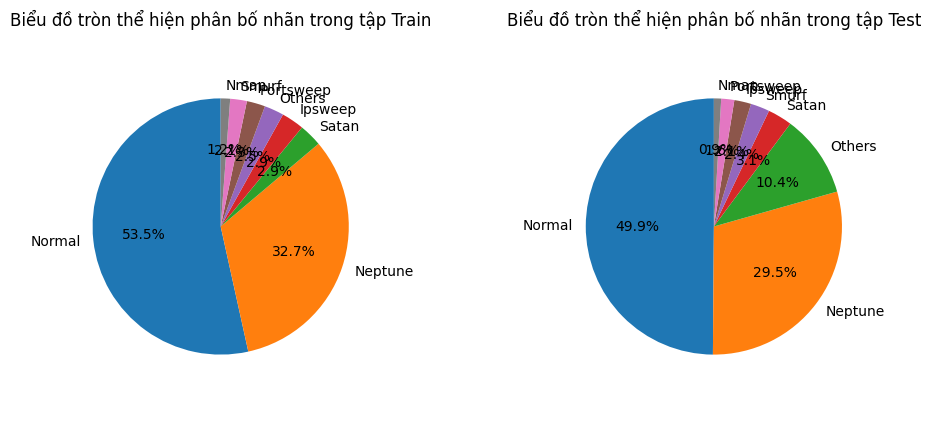

In [165]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ pie thứ nhất
axs[0].pie(values_pie_train, labels=keys_pie_train, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Biểu đồ tròn thể hiện phân bố nhãn trong tập Train')

# Biểu đồ pie thứ hai
axs[1].pie(values_pie_test, labels=keys_pie_test, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Biểu đồ tròn thể hiện phân bố nhãn trong tập Test')

# Đảm bảo đồ thị là hình tròn
axs[0].axis('equal')
axs[1].axis('equal')
plt.subplots_adjust(wspace=0.75)
# Hiển thị đồ thị
plt.show()

**Label Mapping**

In [166]:
label_map = {'normal' : 0, 'neptune' : 1, 'satan' : 2, 'ipsweep': 3, 'others' : 4, 'portsweep': 5, 'smurf': 6, 'nmap' : 7}
df_train['labels'] = df_train['labels'].map(label_map)
df_test['labels'] = df_test['labels'].map(label_map)

**Split data**

**Create Data Train and Data Val**

In [167]:
df_train.shape

(125973, 21)

In [168]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [169]:
X

,duration,protocol_type,flag,wrong_fragment,num_failed_logins,logged_in,is_guest_login,count,srv_count,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,0,0,0,0,0,2,2,0.0,0.0,0.00,150,25,0.17,0.03,0.17,0.00,0.05,0.00
1,0,2,0,0,0,0,0,13,1,0.0,0.0,0.15,255,1,0.00,0.60,0.88,0.00,0.00,0.00
2,0,1,1,0,0,0,0,123,6,0.0,0.0,0.07,255,26,0.10,0.05,0.00,0.00,0.00,0.00
3,0,1,0,0,0,1,0,5,5,0.0,0.0,0.00,30,255,1.00,0.00,0.03,0.04,0.00,0.01
4,0,1,0,0,0,1,0,30,32,0.0,0.0,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,1,0,0,0,0,184,25,0.0,0.0,0.06,255,25,0.10,0.06,0.00,0.00,0.00,0.00
125969,8,2,0,0,0,0,0,2,2,0.0,0.0,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00
125970,0,1,0,0,0,1,0,1,1,0.0,0.0,0.00,255,30,0.12,0.06,0.00,0.00,0.01,0.00
125971,0,1,1,0,0,0,0,144,8,0.0,0.0,0.05,255,8,0.03,0.05,0.00,0.00,0.00,0.00


In [170]:
y

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: labels, Length: 125973, dtype: int64

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [173]:
X_test

,duration,protocol_type,flag,wrong_fragment,num_failed_logins,logged_in,is_guest_login,count,srv_count,rerror_rate,srv_rerror_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,5,1,0,0,0,1,0,1,1,0.00,0.0,0.00,180,57,0.11,0.02,0.01,0.04,0.87,0.0
1,0,2,0,0,0,0,0,192,269,0.00,0.0,0.01,194,155,0.80,0.02,0.01,0.00,0.00,0.0
2,0,2,0,0,0,0,0,121,121,0.00,0.0,0.00,255,255,1.00,0.00,0.01,0.00,0.00,0.0
3,1979,2,0,0,0,0,0,2,2,0.00,0.0,0.00,255,2,0.01,0.84,1.00,0.00,0.00,0.0
4,14462,1,3,0,0,0,0,2,2,1.00,1.0,0.00,255,2,0.01,0.68,1.00,0.00,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,2,0,0,0,0,395,1,0.93,1.0,1.00,255,1,0.00,1.00,0.00,0.00,0.91,1.0
22540,0,1,0,0,0,1,0,2,2,0.00,0.0,0.00,27,255,1.00,0.00,0.04,0.04,0.00,0.0
22541,0,1,1,0,0,0,0,202,10,0.00,0.0,0.07,255,25,0.10,0.07,0.00,0.00,0.00,0.0
22542,0,1,3,0,0,0,0,2,1,0.50,1.0,1.00,255,1,0.00,0.58,0.57,0.00,0.58,1.0


In [174]:
y_test

0        0
1        0
2        0
3        0
4        5
        ..
22539    2
22540    0
22541    1
22542    5
22543    0
Name: labels, Length: 22544, dtype: int64

**LABEL ENCODER**

In [175]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [176]:
y_train_encoder = to_categorical(y_train, num_classes=8)
y_train_encoder

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [177]:
y_val_encoder = to_categorical(y_val, num_classes=8)

In [178]:
correlations = X_train.corrwith(y_train)
print(correlations)

duration                       0.187741
protocol_type                 -0.385151
flag                           0.267097
wrong_fragment                 0.186164
num_failed_logins              0.009377
logged_in                     -0.401406
is_guest_login                 0.010382
count                          0.279127
srv_count                      0.291856
rerror_rate                    0.215128
srv_rerror_rate                0.217679
diff_srv_rate                  0.113055
dst_host_count                 0.064728
dst_host_srv_count            -0.331560
dst_host_same_srv_rate        -0.224454
dst_host_diff_srv_rate         0.304164
dst_host_same_src_port_rate    0.517101
dst_host_srv_diff_host_rate    0.210538
dst_host_rerror_rate           0.193647
dst_host_srv_rerror_rate       0.214490
dtype: float64


In [179]:
correlations = X_test.corrwith(y_test)
print(correlations)

duration                       0.152550
protocol_type                 -0.342327
flag                           0.254007
wrong_fragment                 0.114585
num_failed_logins              0.125061
logged_in                     -0.330090
is_guest_login                 0.111284
count                          0.168637
srv_count                      0.207175
rerror_rate                    0.194957
srv_rerror_rate                0.192707
diff_srv_rate                  0.153361
dst_host_count                 0.105694
dst_host_srv_count            -0.242974
dst_host_same_srv_rate        -0.157192
dst_host_diff_srv_rate         0.245484
dst_host_same_src_port_rate    0.393474
dst_host_srv_diff_host_rate    0.144415
dst_host_rerror_rate           0.172968
dst_host_srv_rerror_rate       0.177264
dtype: float64


**Model**

In [180]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from tensorflow.keras.callbacks import ModelCheckpoint

In [212]:
focal_loss = tf.keras.losses.BinaryFocalCrossentropy(alpha=0.75, gamma=3.0)

In [213]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
'''inputs = Input(shape=(34,1))
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y1 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y2 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(124, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(6, activation='softmax')(y)

y = Concatenate()([y, y1, y2])

outputs = Dense(6, activation='softmax')(y)
model = Model(inputs=inputs, outputs=outputs)'''

'inputs = Input(shape=(34,1))\ny = Conv1D(62, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)\ny = MaxPooling1D(pool_size=(2))(y)\ny1 = Flatten()(y)\n\ny = Dropout(0.5)(y)\ny = Conv1D(62, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)\ny = MaxPooling1D(pool_size=(2))(y)\ny2 = Flatten()(y)\n\ny = Dropout(0.5)(y)\ny = Conv1D(124, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)\ny = MaxPooling1D(pool_size=(2))(y)\ny = Flatten()(y)\ny = Dropout(0.5)(y)\ny = Dense(256, activation="relu")(y)\ny = Dropout(0.5)(y)\ny = Dense(6, activation=\'softmax\')(y)\n\ny = Concatenate()([y, y1, y2])\n\noutputs = Dense(6, activation=\'softmax\')(y)\nmodel = Model(inputs=inputs, outputs=outputs)'

In [ ]:
'''model = Sequential()
#model.add(Dense(256, input_dim=34, activation='relu'))
#model.add(Dropout(0.3))
#model.add(LSTM(50, input_shape=(34, 1), return_sequences=True))''
#model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))'''

"model = Sequential()\n#model.add(Dense(256, input_dim=34, activation='relu'))\n#model.add(Dropout(0.3))\n#model.add(LSTM(50, input_shape=(34, 1), return_sequences=True))''\n#model.add(Dropout(0.3))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(6, activation='softmax'))"

In [ ]:
'''model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(38, ),
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.01),


    tf.keras.layers.Dense(units=32, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Dense(units=16, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Dense(units=6, activation='sigmoid'),
])'''


"model = tf.keras.Sequential([\n    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(38, ),\n                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),\n                          bias_regularizer=regularizers.L2(1e-4),\n                          activity_regularizer=regularizers.L2(1e-5)),\n    tf.keras.layers.Dropout(0.01),\n\n    tf.keras.layers.Dense(units=64, activation='relu',\n                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),\n                          bias_regularizer=regularizers.L2(1e-4),\n                          activity_regularizer=regularizers.L2(1e-5)),\n    tf.keras.layers.Dropout(0.01),\n\n\n    tf.keras.layers.Dense(units=32, activation='relu',\n                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),\n                          bias_regularizer=regularizers.L2(1e-4),\n                          activity_regularizer=regularizers.L2(1e-5)),\n    tf.keras.layers.Dropout(0.01),\

In [214]:
input_layer = Input(shape=(20, 1))

# Convolutional Neural Network (CNN) branch
#cnn_branch = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
#cnn_branch = MaxPooling1D(pool_size=2)(cnn_branch)
#cnn_branch = Flatten()(cnn_branch)

# Recurrent Neural Network (RNN) branch
bidirectional_lstm_branch = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
bidirectional_lstm_branch = Bidirectional(LSTM(64))(bidirectional_lstm_branch)

# Concatenate the outputs from both branches
#merged = Concatenate()([cnn_branch, bidirectional_lstm_branch])

# Fully connected layers
dense_layer = Dense(units=128, activation='relu')(bidirectional_lstm_branch)
dense_layer = Dropout(0.01)(dense_layer)
dense_layer = Dense(units=64, activation='relu')(dense_layer)
dense_layer = Dropout(0.01)(dense_layer)
output_layer = Dense(8, activation='softmax')(dense_layer)
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
'''model = Sequential() # initializing model
model.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))'''

'model = Sequential() # initializing model\nmodel.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation=\'relu\'))\nmodel.add(MaxPool1D(pool_size=(4)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv1D(32, 3, padding="same", activation=\'relu\'))\nmodel.add(MaxPool1D(pool_size=(4)))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(units=50))\n# output layer with softmax activation\nmodel.add(Dense(units=5,activation=\'softmax\'))'

In [215]:
model.compile(loss=focal_loss,
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])

In [216]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 20, 128)           33792     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256

In [217]:
# Huấn luyện mô hình
a = model.fit(X_train, y_train_encoder, epochs = 2000, batch_size = 10000, validation_data = (X_val, y_val_encoder), callbacks=[checkpoint])

Epoch 1/2000
10/11 [==========================>...] - ETA: 0s - loss: 0.0403 - accuracy: 0.4804
Epoch 1: val_accuracy improved from -inf to 0.53483, saving model to best_model.h5
11/11 [==============================] - 15s 262ms/step - loss: 0.0402 - accuracy: 0.4807 - val_loss: 0.0250 - val_accuracy: 0.5348
Epoch 2/2000
 1/11 [=>............................] - ETA: 1s - loss: 0.0251 - accuracy: 0.5689

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch 751/2000
10/11 [==========================>...] - ETA: 0s - loss: 1.6184e-04 - accuracy: 0.9946
Epoch 751: val_accuracy did not improve from 0.99194
11/11 [==============================] - 1s 115ms/step - loss: 1.6160e-04 - accuracy: 0.9946 - val_loss: 0.0010 - val_accuracy: 0.9917
Epoch 752/2000
10/11 [==========================>...] - ETA: 0s - loss: 1.5554e-04 - accuracy: 0.9947
Epoch 752: val_accuracy did not improve from 0.99194
11/11 [==============================] - 1s 114ms/step - loss: 1.5539e-04 - accuracy: 0.9947 - val_loss: 0.0011 - val_accuracy: 0.9916
Epoch 753/2000
10/11 [==========================>...] - ETA: 0s - loss: 1.5406e-04 - accuracy: 0.9948
Epoch 753: val_accuracy did not improve from 0.99194
11/11 [==============================] - 1s 114ms/step - loss: 1.5415e-04 - accuracy: 0.9948 - val_loss: 0.0011 - val_accuracy: 0.9916
Epoch 754/2000
10/11 [==========================>...] - ETA: 0s - loss: 1

**MODEL EVALUATE**

In [218]:
from tensorflow.keras.models import load_model
# Tải model từ file
model = load_model('/content/best_model.h5')

In [219]:
Test_array = model.predict(X_test)

705/705 [==============================] - 5s 5ms/step


In [220]:
import numpy as np
y_predict = np.argmax(Test_array, axis=-1)

In [221]:
y_predict

array([0, 0, 0, ..., 1, 5, 0])

In [222]:
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(y_test, y_predict)
accuracy * 100

91.70067423704755

In [223]:
import numpy as np
from sklearn.metrics import f1_score

# Tính F1 Macro
f1_macro = f1_score(y_test, y_predict, average='macro')

print("F1 Macro:", f1_macro)

F1 Macro: 0.8817696965216486


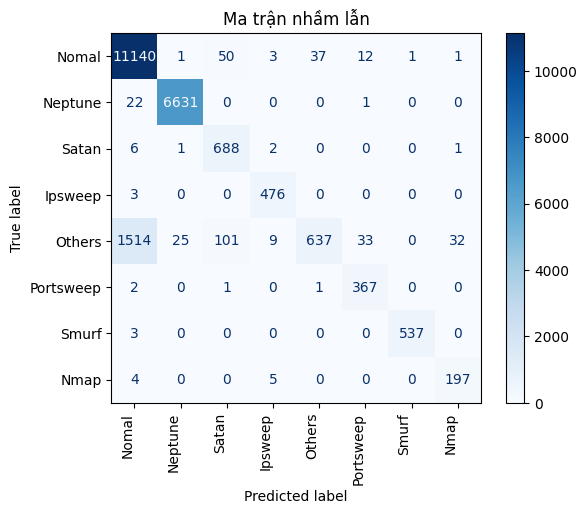

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_predict)

# Vẽ biểu đồ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nomal', 'Neptune', 'Satan', 'Ipsweep', 'Others', 'Portsweep', 'Smurf', 'Nmap'])
disp.plot(cmap='Blues')
plt.xticks(rotation=90, ha='right')
plt.title('Ma trận nhầm lẫn')
plt.show()


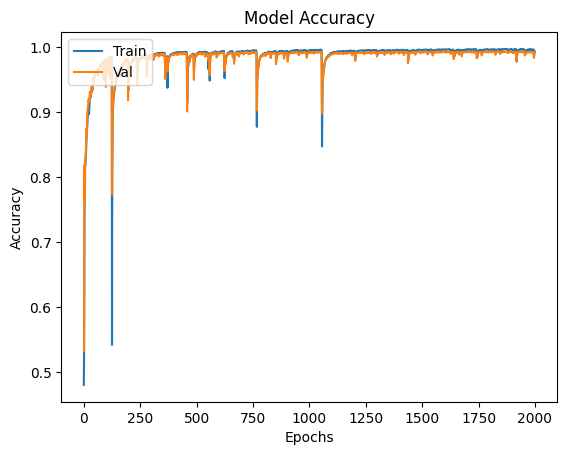

In [225]:
import matplotlib.pyplot as plt

plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

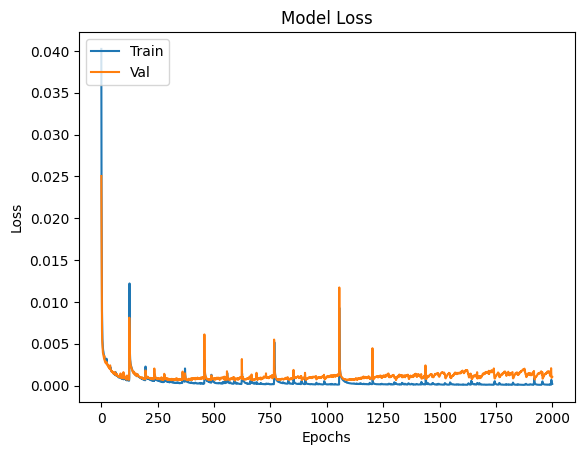

In [226]:
import matplotlib.pyplot as plt

plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()